# Итоговая работа


Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(**driver_response**).


Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost


# 1. Загрузка данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('taxi.csv')
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       -1.000        -1.000           Economy        private                0  
1       18.802        25.217          Standard        private                1  
2        6.747         9.800           Economy        private                0  
3       -1.000        -1.000           Economy        private                1  
4       12.383        19.250           Economy        private                1

# 2. Описание набора данных.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [6]:
data.describe(include='all')

offer_gk    weekday_key       hour_key      driver_gk  \
count   1.000000e+05  100000.000000  100000.000000  100000.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    5.662189e+05       3.159860      13.827790    3446.376360   
std     3.259360e+05       2.054222       7.306496    2038.738677   
min     4.000000e+00       0.000000       0.000000      14.000000   
25%     2.855552e+05       1.000000       8.000000    1421.000000   
50%     5.656715e+05       3.000000      16.000000    3506.500000   
75%     8.487198e+05       5.000000      20.000000    5242.000000   
max     1.130355e+06       6.000000      23.000000    6806.000000   

            order_gk  driver_latitude  driver_longitude  \
count   100000.00000    100000.000000     100000.000000   
unique           NaN              NaN               NaN   
top              NaN              NaN               NaN   
freq             NaN              NaN               NaN   
mean    460867.01291        55.700824         37.492292   
std     266064.98953         2.135903          1.454640   
min         18.00000        -1.000000         -1.000000   
25%     229178.50000        55.708651         37.413497   
50%     462420.00000        55.772904         37.533664   
75%     690894.00000        55.960667         37.624113   
max     920344.00000        56.174097         38.280547   

        origin_order_latitude  origin_order_longitude    distance_km  \
count           100000.000000           100000.000000  100000.000000   
unique                    NaN                     NaN            NaN   
top                       NaN                     NaN            NaN   
freq                      NaN                     NaN            NaN   
mean                55.772440               37.541637      18.393518   
std                  0.665985                0.467758      41.129296   
min                 -1.000000               -1.000000      -1.000000   
25%                 55.708032               37.407117      -1.000000   
50%                 55.772561               37.532537      10.411500   
75%                 55.962000               37.624358      30.665250   
max                 56.311121               38.243608    5234.283000   

         duration_min offer_class_group ride_type_desc  driver_response  
count   100000.000000            100000         100000    100000.000000  
unique            NaN                 9              4              NaN  
top               NaN           Economy        private              NaN  
freq              NaN             48335          91207              NaN  
mean        23.134841               NaN            NaN         0.492480  
std         33.890105               NaN            NaN         0.499946  
min         -1.000000               NaN            NaN         0.000000  
25%         -1.000000               NaN            NaN         0.000000  
50%         19.700000               NaN            NaN         0.000000  
75%         37.867000               NaN            NaN         1.000000  
max       3958.283000               NaN            NaN         1.000000

In [15]:
import pandas_profiling
pandas_profiling.ProfileReport(data)
# profile = pandas_profiling.ProfileReport(data)
# profile.to_file(output_file="PandasProfiling.html")

## 2.1. Предварительное описание набора данных

* Кол-во строк 100 000.   
* Всего 14 признаков. Из них, предварительно: 9 числовых, 2 категориальных, 1 булевый и 2 непонятных (Rejected)


Предупреждения (Warnings)

* weekday_key -  14.4% нулевых значений
* hour_key has 6646 / 6.6% нулевых значений
* driver_latitude is highly skewed (γ1 = -26.369) Сильно скошен
* driver_longitude is highly correlated with driver_latitude (ρ = 0.9862) Сильная корреляция.
* origin_order_latitude is highly skewed (γ1 = -80.541) Сильно скошен  
* origin_order_longitude is highly skewed (γ1 = -72.689) Сильно скошен  
* distance_km is highly skewed (γ1 = 65.397) Сильно скошен  
* duration_min is highly correlated with distance_km (ρ = 0.97703) Высокая корреляция.

Оценка:
* Рассмотреть пропуски в признаках weekday_key, hour_key.
* Скос в координатах нормально, т.к. место одно и то же.
* Корреляция между duration_min и distance_km - обоснованно, т.к. действительно есть зависимость. Можно оставить 1 из показателей.

## 2.2.Разберем каждый показатель отдельно. 

### 2.2.1. offer_gk, driver_gk и order_gk

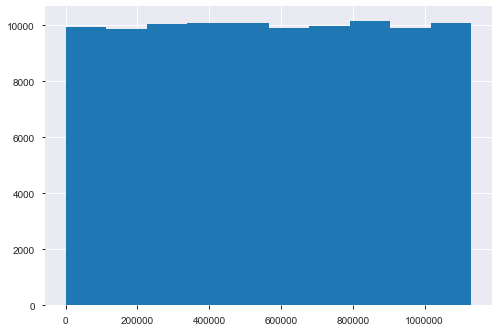

In [13]:
# Проверим распределение
data['offer_gk'].hist()

In [14]:
# Посмотрим из каких значений он состоит
print(data['offer_gk'].nunique(), data['offer_gk'].count())

100000 100000


**Результат 2.2.1.**  
Скорее всего это ID заказа, т.е. не числовое значение. Промежуточно, можно убрать из расчетов.  
Предполагаю, что признаки **driver_gk** и **order_gk** являются аналогичными.

### 2.2.2.  **weekday_key**

Профайлинг показывает, что **weekday_key** имеет 14.4% нулевых значений. Скорее всего обозначение 0 - Воскресенье и т.д.  (0-6)

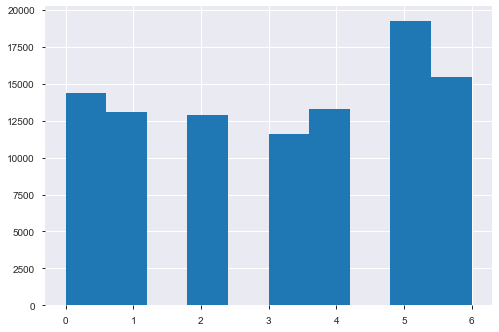

In [17]:
# Проверим распределение
data['weekday_key'].hist()

Данные дня недели - категориальные

### 2.2.3.  **hour_key**
Номер часа, может понадобится для группировки в временные отрезки и т.д. Нулевые значения, это просто 12 часов ночи

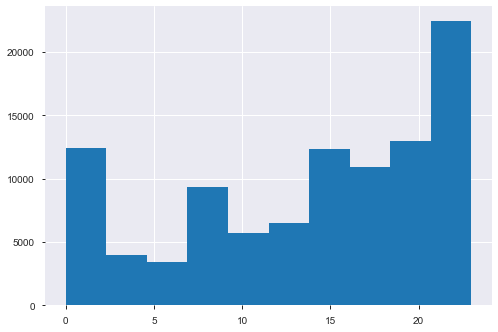

In [20]:
# Проверим распределение
data['hour_key'].hist()

Предположение: наиболее часто берут такси вечером и ночью, что логично.

### 2.2.4.  **Координаты водителя и заказа**
driver_latitude	  
driver_longitude	  
origin_order_latitude  	
origin_order_longitude  


На данном этапе не вижу, зачем требуются данные признаки для задачи.  
Предположения: 
1. Вычислить районы и локации (зачем?)
2. Определить расстояние между водителем и заказом (зачем, т.к. есть параметр расстояние. Как? вроде есть библиотека)

### 2.2.5. **distance_km, duration_min**  
Большое кол-во значений (более четверти) -1. Судя по всему это пропуски  
Около четверти значений без указания расстояния. 
Так же видно, что duration_min коррелирует с данным признаком.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E83CC4048>,
      dtype=object)

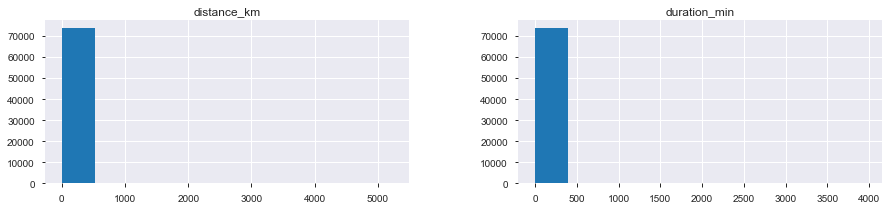

In [21]:
# Посмотрим распределение значений без -1
data.query('distance_km != -1')[['distance_km', 'duration_min']].hist(figsize = (15,3))
# data.query('distance_km != -1')[['distance_km']].hist()

### 2.2.6. offer_class_group

In [34]:
data['offer_class_group'].unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

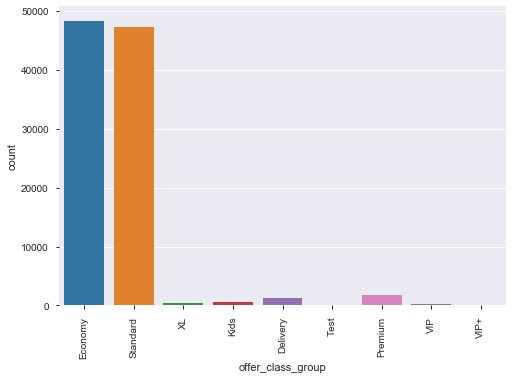

In [36]:
sns.countplot(x='offer_class_group', data=data)
plt.xticks(rotation=90)

In [37]:
# Посмотрим кол-во лотов в каждом районе
data['offer_class_group'].value_counts()

Economy     48335
Standard    47288
Premium      1773
Delivery     1290
Kids          588
XL            464
VIP           225
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

**Результат 2.2.5.**  
Категориальный признак. Можно использовать Label Encoding.

### 2.2.7. ride_type_desc

In [38]:
# Преобразование категориальной переменной 'ride_type_desc'
data['ride_type_desc'].unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

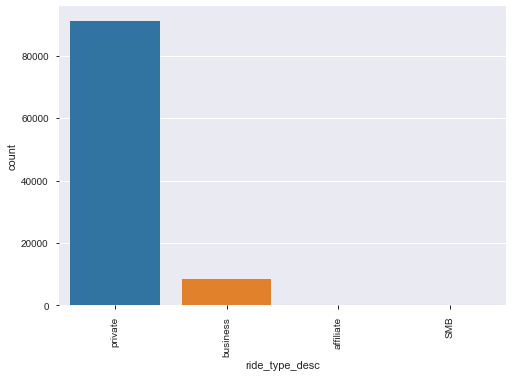

In [39]:
sns.countplot(x='ride_type_desc', data=data)
plt.xticks(rotation=90)

In [40]:
# Посмотрим кол-во лотов в каждом районе
data['ride_type_desc'].value_counts()

private      91207
business      8533
affiliate      224
SMB             36
Name: ride_type_desc, dtype: int64

In [41]:
data[(data['ride_type_desc'] == 'affiliate') | (data['ride_type_desc'] == 'SMB')].count()

offer_gk                  260
weekday_key               260
hour_key                  260
driver_gk                 260
order_gk                  260
driver_latitude           260
driver_longitude          260
origin_order_latitude     260
origin_order_longitude    260
distance_km               260
duration_min              260
offer_class_group         260
ride_type_desc            260
driver_response           260
dtype: int64

**Результат 2.2.7.**  
Категориальный признак. Можно использовать Label Encoding.  
Тип поездки: private, business, affiliate, SMB  
260 строк из 100 000 - можно удалить. Пока оставляем.

# 3. Выявление пропусков и их обработка.

## 3.1. Пропуски одновременно в координатах, расстоянии и времени поездки.

In [51]:
data.query('driver_latitude == -1 & distance_km == -1')

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
565      638186            5        14       6272    817074             -1.0   
2111     567790            1        12       6792    820788             -1.0   
2137     427612            6        21       6792     32158             -1.0   
2145     845726            6         0       6792    552732             -1.0   
2183     177029            0        17       6792    658177             -1.0   
...         ...          ...       ...        ...       ...              ...   
79434     73738            2        23         42    354003             -1.0   
83631   1077757            1         7       5578     62551             -1.0   
85335     75929            5        14        468    776944             -1.0   
89970   1110601            6        13        259    135435             -1.0   
92814   1033564            5        13       4850    322984             -1.0   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
565                -1.0              55.908664               37.597781   
2111               -1.0              55.415361               37.898917   
2137               -1.0              55.415361               37.898917   
2145               -1.0              55.415361               37.898917   
2183               -1.0              55.415361               37.898917   
...                 ...                    ...                     ...   
79434              -1.0              55.694926               37.380291   
83631              -1.0              55.600737               37.539690   
85335              -1.0              55.387756               37.549058   
89970              -1.0              55.962322               37.407117   
92814              -1.0              55.996121               37.381657   

       distance_km  duration_min offer_class_group ride_type_desc  \
565           -1.0          -1.0          Standard       business   
2111          -1.0          -1.0          Standard       business   
2137          -1.0          -1.0          Standard       business   
2145          -1.0          -1.0          Standard       business   
2183          -1.0          -1.0          Standard       business   
...            ...           ...               ...            ...   
79434         -1.0          -1.0          Standard       business   
83631         -1.0          -1.0          Delivery       business   
85335         -1.0          -1.0          Standard       business   
89970         -1.0          -1.0          Standard       business   
92814         -1.0          -1.0          Standard       business   

       driver_response  
565                  1  
2111                 1  
2137                 1  
2145                 1  
2183                 1  
...                ...  
79434                1  
83631                1  
85335                1  
89970                1  
92814                1  

[122 rows x 14 columns]

В данном случае, предпологаю, это ошибка в заполнении данных. Если данные получались автоматически, то ошибка gps (как вариант)
Если вручную, то пропуск в заполнении.
Решение - удаление 122 элементов из 100 тыс.

In [84]:
# data_03 - датафрейм в разделе 03. Будет формироваться по ходу обработки пропусков.
# Удалим из датафрейма строки, где одновременно отсутствуют и координаты и расстояние
data_03_index = data.query('driver_latitude == -1 & distance_km == -1').index
data_03 = data[~data.index.isin(data_03_index)]

In [85]:
data_03

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0       1105373            5        20       6080    174182        55.818842   
1        759733            5        14       6080    358774        55.805342   
2        416977            6        14       6080    866260        55.813978   
3        889660            2         6       6080    163522        55.745922   
4       1120055            4        16       6080    506710        55.803578   
...         ...          ...       ...        ...       ...              ...   
99995    726210            0         2       2442     27360        55.961246   
99996    881472            0         1       2442    381960        55.961246   
99997    626673            1        20       2442    627126        55.961315   
99998    672584            6        21       2442    140623        55.961354   
99999    542637            0        23       2442    140050        55.961364   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
0             37.334562              55.814567               37.355010   
1             37.515023              55.819329               37.466398   
2             37.347688              55.814827               37.354074   
3             37.421748              55.743469               37.431130   
4             37.521602              55.812559               37.527407   
...                 ...                    ...                     ...   
99995         37.413497              55.966694               37.415754   
99996         37.413497              55.964892               37.413543   
99997         37.413497              55.962203               37.416373   
99998         37.413864              55.964892               37.413543   
99999         37.413864              55.962322               37.407117   

       distance_km  duration_min offer_class_group ride_type_desc  \
0           -1.000        -1.000           Economy        private   
1           18.802        25.217          Standard        private   
2            6.747         9.800           Economy        private   
3           -1.000        -1.000           Economy        private   
4           12.383        19.250           Economy        private   
...            ...           ...               ...            ...   
99995       17.378        29.817           Economy        private   
99996        7.751        12.683           Economy        private   
99997       46.983        46.217          Standard        private   
99998       50.029        51.100           Economy        private   
99999       54.811        56.183          Standard        private   

       driver_response  
0                    0  
1                    1  
2                    0  
3                    1  
4                    1  
...                ...  
99995                0  
99996                0  
99997                0  
99998                0  
99999                0  

[99878 rows x 14 columns]

## 3.2. Пропуски в расстоянии distance_km.

In [87]:
data_03['distance_km'].median()

10.4435

In [88]:
data_03[data_03['distance_km'] == -1]

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0       1105373            5        20       6080    174182        55.818842   
3        889660            2         6       6080    163522        55.745922   
6        103326            2        11       6080    615584        55.753508   
19       533917            5         8       6080    596531        55.913718   
21       123897            4        12       6080    185909        55.766763   
...         ...          ...       ...        ...       ...              ...   
99979   1088748            1         2       2442    458538        55.961383   
99981    397745            1        23       2442    383092        55.961397   
99987    871592            4        23       2442    802677        55.961121   
99991    619039            6        23       2442    323136        55.961239   
99994    915788            5         0       2442    636975        55.961351   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
0             37.334562              55.814567               37.355010   
3             37.421748              55.743469               37.431130   
6             37.663742              55.757251               37.659064   
19            37.401395              55.921554               37.403505   
21            37.607275              55.772388               37.606330   
...                 ...                    ...                     ...   
99979         37.413560              55.962322               37.407117   
99981         37.413560              55.962322               37.407117   
99987         37.414019              55.961995               37.406355   
99991         37.413497              55.962322               37.407117   
99994         37.413864              55.964220               37.423526   

       distance_km  duration_min offer_class_group ride_type_desc  \
0             -1.0          -1.0           Economy        private   
3             -1.0          -1.0           Economy        private   
6             -1.0          -1.0          Standard       business   
19            -1.0          -1.0          Standard       business   
21            -1.0          -1.0          Standard       business   
...            ...           ...               ...            ...   
99979         -1.0          -1.0          Standard        private   
99981         -1.0          -1.0          Standard        private   
99987         -1.0          -1.0          Standard        private   
99991         -1.0          -1.0          Standard        private   
99994         -1.0          -1.0           Economy        private   

       driver_response  
0                    0  
3                    1  
6                    1  
19                   0  
21                   0  
...                ...  
99979                0  
99981                0  
99987                0  
99991                0  
99994                0  

[26085 rows x 14 columns]

In [89]:
# Заменяем пропуски на медиану
# data_new2[data_new2['distance_km'] == -1]['distance_km']
data_03['distance_km'] = data_03['distance_km'].replace(-1, data_03['distance_km'].median())

F:\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
# Проверим, остались ли еще пропуски
data_03[data_03['distance_km'] == -1]['distance_km']

Series([], Name: distance_km, dtype: float64)

In [93]:
data_03.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0      10.4435        -1.000           Economy        private                0  
1      18.8020        25.217          Standard        private                1  
2       6.7470         9.800           Economy        private                0  
3      10.4435        -1.000           Economy        private                1  
4      12.3830        19.250           Economy        private                1

# 4. Определение зависимостей

По профайлингу корреляция отсутствует, за исключением distance_km  и duration_min
Построим матрицу только с учетом числовых значений.

In [94]:
data_04 = data_03[['distance_km', 'duration_min', 'offer_class_group', 'ride_type_desc', 'driver_response']]
data_04.head()

distance_km  duration_min offer_class_group ride_type_desc  driver_response
0      10.4435        -1.000           Economy        private                0
1      18.8020        25.217          Standard        private                1
2       6.7470         9.800           Economy        private                0
3      10.4435        -1.000           Economy        private                1
4      12.3830        19.250           Economy        private                1

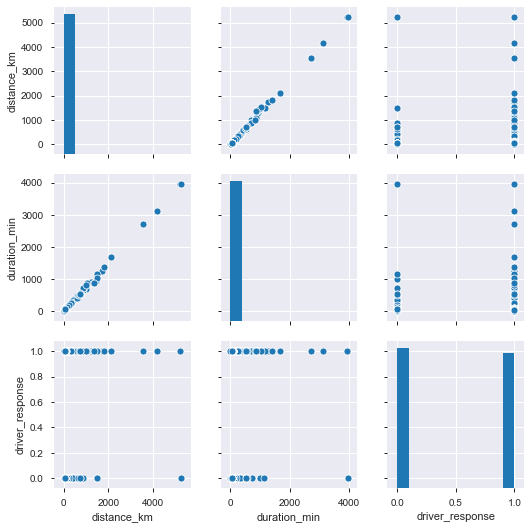

In [95]:
sns.pairplot(data_04)

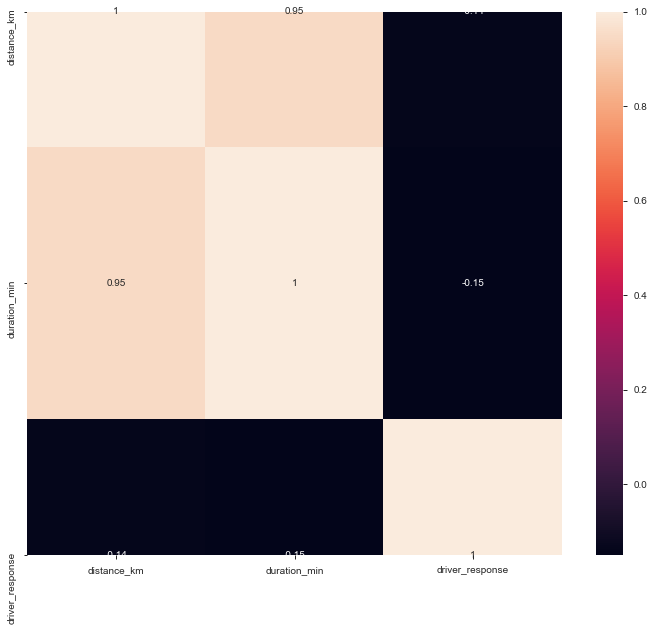

In [96]:
correlation_matrix = data_04.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

**Результат 4.**  
Повторяется предыдущий результат:   
Корреляция между duration_min и distance_km - обоснованно, т.к. действительно есть зависимость.  
По остальным признакам явной корреляции не выявлено 

In [99]:
# Удалим duration_min
data_04 = data_03.drop(['duration_min'], axis=1)

In [100]:
data_04.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km offer_class_group ride_type_desc  driver_response  
0      10.4435           Economy        private                0  
1      18.8020          Standard        private                1  
2       6.7470           Economy        private                0  
3      10.4435           Economy        private                1  
4      12.3830           Economy        private                1

# 5. Преобразование категориальных признаков.

## 5.1. Преобразование offer_class_group

In [110]:
offer_class_group = data_04['offer_class_group'].get_values().reshape(-1, 1)

F:\Python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


In [111]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(offer_class_group)
label_result = label_encoder.transform(offer_class_group)
label_result

F:\Python\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Python\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 4, 1, ..., 4, 1, 4])

In [112]:
offer_class_group

array([['Economy'],
       ['Standard'],
       ['Economy'],
       ...,
       ['Standard'],
       ['Economy'],
       ['Standard']], dtype=object)

In [113]:
for n, vect in zip(offer_class_group[:10], label_result[:10]):
    print(n, '!!!!', vect)

['Economy'] !!!! 1
['Standard'] !!!! 4
['Economy'] !!!! 1
['Economy'] !!!! 1
['Economy'] !!!! 1
['Economy'] !!!! 1
['Standard'] !!!! 4
['Economy'] !!!! 1
['Economy'] !!!! 1
['Economy'] !!!! 1


In [114]:
pd.DataFrame(label_result)[:10]

0
0  1
1  4
2  1
3  1
4  1
5  1
6  4
7  1
8  1
9  1

In [116]:
offer_class_group_df = pd.DataFrame(label_result)
offer_class_group_df.index = data_04.index
offer_class_group_df.columns = ['offer_class_group_new']

In [117]:
offer_class_group_df

offer_class_group_new
0                          1
1                          4
2                          1
3                          1
4                          1
...                      ...
99995                      1
99996                      1
99997                      4
99998                      1
99999                      4

[99878 rows x 1 columns]

In [118]:
data_51 = pd.concat([data_04, offer_class_group_df], axis=1)
data_51 = data_51.drop(['offer_class_group'], axis=1)
data_51.head(5)

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km ride_type_desc  driver_response  offer_class_group_new  
0      10.4435        private                0                      1  
1      18.8020        private                1                      4  
2       6.7470        private                0                      1  
3      10.4435        private                1                      1  
4      12.3830        private                1                      1

## 5.2. Преобразование ride_type_desc

In [119]:
ride_type_desc = data_51['ride_type_desc'].get_values().reshape(-1, 1)

F:\Python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


In [120]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(ride_type_desc)
label_result = label_encoder.transform(ride_type_desc)
label_result

F:\Python\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Python\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 3, ..., 3, 3, 3])

In [121]:
ride_type_desc

array([['private'],
       ['private'],
       ['private'],
       ...,
       ['private'],
       ['private'],
       ['private']], dtype=object)

In [122]:
for n, vect in zip(ride_type_desc[:10], label_result[:10]):
    print(n, '!!!!', vect)

['private'] !!!! 3
['private'] !!!! 3
['private'] !!!! 3
['private'] !!!! 3
['private'] !!!! 3
['private'] !!!! 3
['business'] !!!! 2
['private'] !!!! 3
['private'] !!!! 3
['private'] !!!! 3


In [124]:
pd.DataFrame(label_result)[:10]

0
0  3
1  3
2  3
3  3
4  3
5  3
6  2
7  3
8  3
9  3

In [126]:
ride_type_desc_df = pd.DataFrame(label_result)
ride_type_desc_df.index = data_51.index
ride_type_desc_df.columns = ['ride_type_desc_new']

In [127]:
ride_type_desc_df

ride_type_desc_new
0                       3
1                       3
2                       3
3                       3
4                       3
...                   ...
99995                   3
99996                   3
99997                   3
99998                   3
99999                   3

[99878 rows x 1 columns]

In [128]:
data_52 = pd.concat([data_51, ride_type_desc_df], axis=1)
data_52 = data_52.drop(['ride_type_desc'], axis=1)
data_52.head(5)

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  driver_response  offer_class_group_new  ride_type_desc_new  
0      10.4435                0                      1                   3  
1      18.8020                1                      4                   3  
2       6.7470                0                      1                   3  
3      10.4435                1                      1                   3  
4      12.3830                1                      1                   3

# 6.Преобразование координат

Заменим координаты водителя и заказчика на расстояние до заказчика, это позволит ввести новый признак и определить на каком расстоянии водитель соглашается ехать. 

Расстояние будем вычислять по формуле **Haversine**  
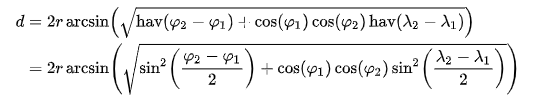

In [136]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [137]:
haversine(55.805342, 37.515023, 55.819329, 37.466398)

5.545892540949534

In [155]:
# Проставляем значения столбцов в формулу
haversine_df = []
for element in data_52.index:
    haversine_df.append(haversine(data_52['driver_latitude'][element],
                                  data_52['driver_longitude'][element],
                                  data_52['origin_order_latitude'][element],
                                  data_52['origin_order_longitude'][element]))


In [158]:
data_06 = data_52
data_06['distance'] = haversine_df

In [160]:
data_06 = data_06.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1)

In [161]:
data_06.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  distance_km  \
0   1105373            5        20       6080    174182      10.4435   
1    759733            5        14       6080    358774      18.8020   
2    416977            6        14       6080    866260       6.7470   
3    889660            2         6       6080    163522      10.4435   
4   1120055            4        16       6080    506710      12.3830   

   driver_response  offer_class_group_new  ride_type_desc_new  distance  
0                0                      1                   3  2.304906  
1                1                      4                   3  5.545893  
2                0                      1                   3  0.714045  
3                1                      1                   3  1.065481  
4                1                      1                   3  1.021735

# 7. Рассчитаем модель

## 7.1. Вариант модели логистическая регрессия.

In [162]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

In [163]:
X71 = data_06[['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'distance_km', 'offer_class_group_new',
       'ride_type_desc_new', 'distance']]
y71 = data_06['driver_response']

In [164]:
X71[:5]

offer_gk  weekday_key  hour_key  driver_gk  order_gk  distance_km  \
0   1105373            5        20       6080    174182      10.4435   
1    759733            5        14       6080    358774      18.8020   
2    416977            6        14       6080    866260       6.7470   
3    889660            2         6       6080    163522      10.4435   
4   1120055            4        16       6080    506710      12.3830   

   offer_class_group_new  ride_type_desc_new  distance  
0                      1                   3  2.304906  
1                      4                   3  5.545893  
2                      1                   3  0.714045  
3                      1                   3  1.065481  
4                      1                   3  1.021735

In [165]:
y71[:5]

0    0
1    1
2    0
3    1
4    1
Name: driver_response, dtype: int64

In [167]:
X_train,X_test,y_train,y_test = train_test_split(X71,y71,test_size = 0.3,random_state = 3)

In [189]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_
print('slope:', model.coef_)

F:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Точность предсказания модели:  0.6327593111734081
slope: [[ 2.44441526e-07  1.88292543e-03  4.37948624e-03  4.42356544e-05
   2.68098797e-07 -2.83022079e-02  3.18511993e-03  6.01762065e-04
   2.47034609e-04]]


**Результат 7.1.**  
Точность модели невысокая, продолжим дальше

## 7.2. Вариант модели случайный лес.

In [169]:
X72 = data_06[['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'distance_km', 'offer_class_group_new',
       'ride_type_desc_new', 'distance']]
y72 = data_06['driver_response']

In [170]:
X72[:5]

offer_gk  weekday_key  hour_key  driver_gk  order_gk  distance_km  \
0   1105373            5        20       6080    174182      10.4435   
1    759733            5        14       6080    358774      18.8020   
2    416977            6        14       6080    866260       6.7470   
3    889660            2         6       6080    163522      10.4435   
4   1120055            4        16       6080    506710      12.3830   

   offer_class_group_new  ride_type_desc_new  distance  
0                      1                   3  2.304906  
1                      4                   3  5.545893  
2                      1                   3  0.714045  
3                      1                   3  1.065481  
4                      1                   3  1.021735

In [171]:
y72[:5]

0    0
1    1
2    0
3    1
4    1
Name: driver_response, dtype: int64

In [172]:
X_train,X_test,y_train,y_test = train_test_split(X72,y72,test_size = 0.3,random_state = 3)

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X72, y72 = make_classification(n_samples=1000, n_features=9,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X72, y72)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X72, y72))

Значимость признаков:  [0.10191608 0.65351288 0.05913993 0.03598146 0.04503979 0.02429704
 0.03119167 0.02414519 0.02477597]
Точность модели: 0.954


**Результат 7.2.**  
Точность модели хорошая, попробуем еще.

## 7.3. Вариант модели случайный лес. Уберем индентификаторы.

In [183]:
X73 = data_06[['weekday_key', 'hour_key', 'distance_km', 'offer_class_group_new',
       'ride_type_desc_new', 'distance']]
y73 = data_06['driver_response']

In [184]:
X73[:5]

weekday_key  hour_key  distance_km  offer_class_group_new  \
0            5        20      10.4435                      1   
1            5        14      18.8020                      4   
2            6        14       6.7470                      1   
3            2         6      10.4435                      1   
4            4        16      12.3830                      1   

   ride_type_desc_new  distance  
0                   3  2.304906  
1                   3  5.545893  
2                   3  0.714045  
3                   3  1.065481  
4                   3  1.021735

In [191]:
y73[:5]

array([0, 0, 0, 0, 0])

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X73,y73,test_size = 0.3,random_state = 3)

In [193]:
X73, y73 = make_classification(n_samples=1000, n_features=6,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X73, y73)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X73, y73))

Значимость признаков:  [0.1079594  0.72695554 0.05951416 0.02792248 0.03718728 0.04046114]
Точность модели: 0.951


**Результат 7.3.**  
Точность модели хорошая, но есть сомнения в часе дня.

## 7.4. Вариант модели случайный лес. Уберем час дня

In [194]:
X74 = data_06[['weekday_key', 'distance_km', 'offer_class_group_new',
       'ride_type_desc_new', 'distance']]
y74 = data_06['driver_response']

X_train,X_test,y_train,y_test = train_test_split(X74,y74,test_size = 0.3,random_state = 3)

X74, y74 = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X74, y74)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X74, y74))

Значимость признаков:  [0.14205973 0.76664038 0.0282433  0.06305659]
Точность модели: 0.946


**Результат 7.4.**  
Точность модели снизилась. За рабочую выбираем модель 7.2. или 7.3.